#**SUV Prediction**

**- by Bujji Saikam**

####**Collection of Data**

In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [28]:
data = pd.read_csv('/content/sample_data/suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
data.shape

(400, 5)

####**Analysing Data**

<Axes: xlabel='Gender', ylabel='count'>

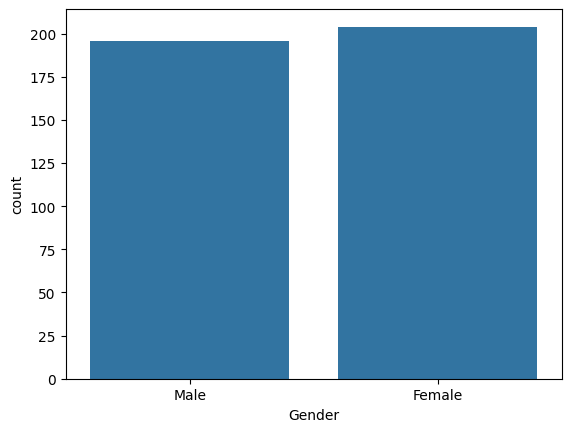

In [30]:
sns.countplot(x = 'Gender', data = data)

<Axes: xlabel='Gender', ylabel='count'>

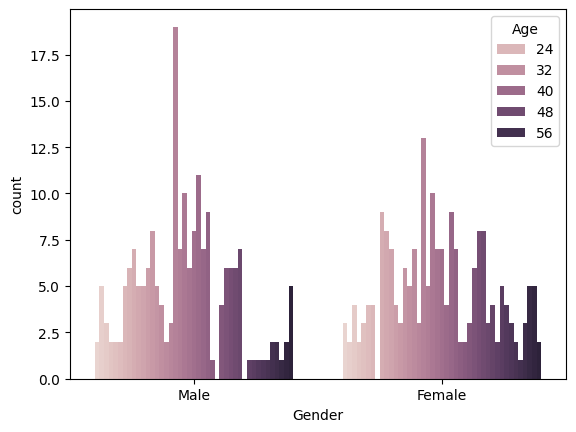

In [31]:
sns.countplot(x = 'Gender', hue = 'Age', data = data)

<Axes: xlabel='Gender', ylabel='count'>

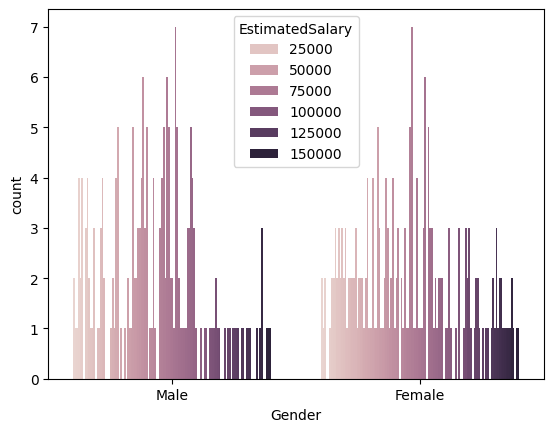

In [32]:
sns.countplot(x = 'Gender', hue = 'EstimatedSalary', data= data)

<Axes: xlabel='Gender', ylabel='count'>

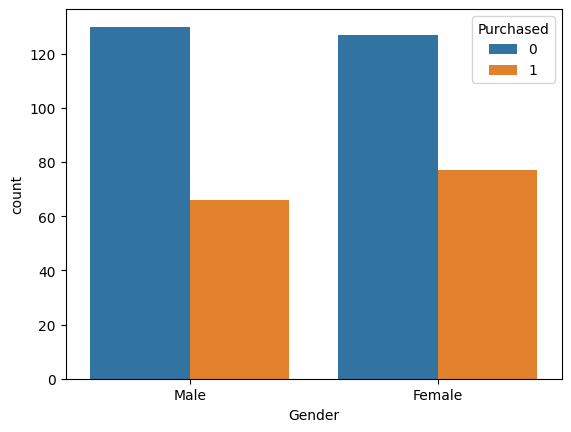

In [33]:
sns.countplot(x = 'Gender', hue = 'Purchased', data= data)

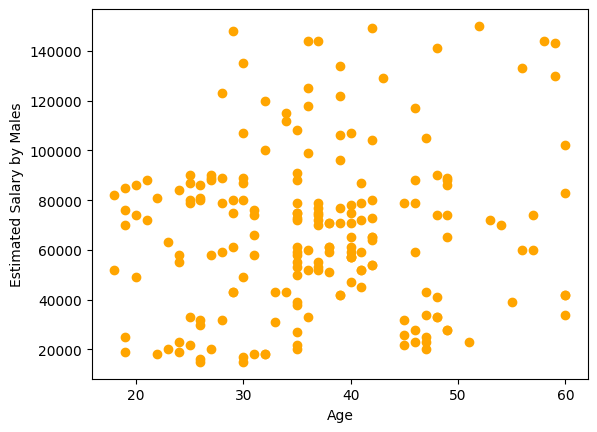

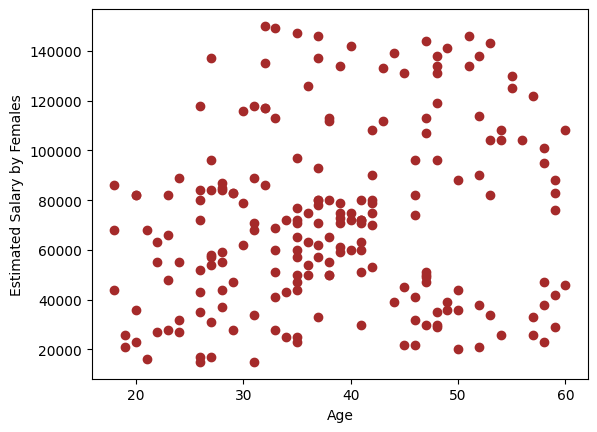

In [34]:
# seperate the gender
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

# plot for males by age and estimated the salary
plt.scatter(x = male['Age'], y = male['EstimatedSalary'], color= 'orange')
plt.xlabel('Age')
plt.ylabel('Estimated Salary by Males')
plt.show()

#plot for females by age and estimated the salary
plt.scatter(x = female['Age'], y = female['EstimatedSalary'], color= 'brown')
plt.xlabel('Age')
plt.ylabel('Estimated Salary by Females')
plt.show()

####**Data Wrangling**

In [35]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [36]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [37]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [39]:
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


####**Train Test Split**

In [40]:
x = data.drop(['Age','EstimatedSalary'], axis = 1)
y = data.iloc[:,2].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state =1)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [46]:
from sklearn.metrics import classification_report

In [47]:
predictions= logmodel.predict(x_test)

In [48]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        72\n           1       1.00      1.00      1.00        48\n\n    accuracy                           1.00       120\n   macro avg       1.00      1.00      1.00       120\nweighted avg       1.00      1.00      1.00       120\n'

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, predictions)

array([[72,  0],
       [ 0, 48]])

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, predictions)

1.0

####**Conclusion**
Accuracy is typically represented as a value between 0 and 1, where 0 means the model always predicts the wrong label, and 1 (or 100%) means it always predicts the correct label.